<a href="https://colab.research.google.com/github/JaquelineMera/Analisis_Retrasos_Vuelos/blob/main/vuelos_exploracion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Librerias para Histograma y Boxplot
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

In [2]:
# Nombrar mis dataframes
df_airlines = pd.read_csv('/content/AIRLINE_CODE_DICTIONARY_C.csv')
df_dot = pd.read_csv('/content/DOT_CODE_DICTIONARY_C.csv')
df_flights = pd.read_csv('/content/flights_202301.csv')

In [3]:
type(df_flights)

pandas.core.frame.DataFrame

#TABLA DE VUELOS

In [4]:
# Informacion de mi tabla
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538837 entries, 0 to 538836
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   FL_DATE                  538837 non-null  object 
 1   AIRLINE_CODE             538837 non-null  object 
 2   DOT_CODE                 538837 non-null  int64  
 3   FL_NUMBER                538837 non-null  int64  
 4   ORIGIN                   538837 non-null  object 
 5   ORIGIN_CITY              538837 non-null  object 
 6   DEST                     538837 non-null  object 
 7   DEST_CITY                538837 non-null  object 
 8   CRS_DEP_TIME             538837 non-null  int64  
 9   DEP_TIME                 528859 non-null  float64
 10  DEP_DELAY                528855 non-null  float64
 11  TAXI_OUT                 528640 non-null  float64
 12  WHEELS_OFF               528640 non-null  float64
 13  WHEELS_ON                528318 non-null  float64
 14  TAXI

In [5]:
df_flights.describe()

DOT_CODE      FL_NUMBER   CRS_DEP_TIME       DEP_TIME  \
count  538837.000000  538837.000000  538837.000000  528859.000000   
mean    19944.883041    2201.929604    1327.415619    1334.441891   
std       374.068602    1547.198171     489.902674     502.427715   
min     19393.000000       1.000000       5.000000       1.000000   
25%     19790.000000     972.000000     910.000000     917.000000   
50%     19930.000000    1909.000000    1320.000000    1327.000000   
75%     20363.000000    3056.000000    1732.000000    1743.000000   
max     20452.000000    9887.000000    2359.000000    2400.000000   

           DEP_DELAY       TAXI_OUT     WHEELS_OFF      WHEELS_ON  \
count  528855.000000  528640.000000  528640.000000  528318.000000   
mean       12.937247      18.334566    1358.483518    1471.856121   
std        55.435948      10.624460     503.858558     532.185174   
min       -52.000000       1.000000       1.000000       1.000000   
25%        -6.000000      12.000000     934.000000    1054.000000   
50%        -2.000000      15.000000    1341.000000    1509.000000   
75%        10.000000      21.000000    1757.000000    1917.000000   
max      3024.000000     222.000000    2400.000000    2400.000000   

             TAXI_IN   CRS_ARR_TIME  ...       AIR_TIME       DISTANCE  \
count  528318.000000  538837.000000  ...  527197.000000  538837.000000   
mean        8.038000    1497.177636  ...     115.814365     830.110802   
std         6.416574     515.236763  ...      71.811305     600.126873   
min         1.000000       1.000000  ...       8.000000      31.000000   
25%         4.000000    1109.000000  ...      63.000000     397.000000   
50%         6.000000    1520.000000  ...      99.000000     679.000000   
75%         9.000000    1927.000000  ...     146.000000    1067.000000   
max       173.000000    2359.000000  ...     695.000000    5095.000000   

       DELAY_DUE_CARRIER  DELAY_DUE_WEATHER  DELAY_DUE_NAS  \
count      116713.000000      116713.000000  116713.000000   
mean           24.509343           4.383968      14.648488   
std            73.732581          38.069314      32.531918   
min             0.000000           0.000000       0.000000   
25%             0.000000           0.000000       0.000000   
50%             3.000000           0.000000       1.000000   
75%            23.000000           0.000000      18.000000   
max          3024.000000        1653.000000    1343.000000   

       DELAY_DUE_SECURITY  DELAY_DUE_LATE_AIRCRAFT   FL_YEAR  FL_MONTH  \
count       116713.000000            116713.000000  538837.0  538837.0   
mean             0.146248                25.755743    2023.0       1.0   
std              2.895832                57.507827       0.0       0.0   
min              0.000000                 0.000000    2023.0       1.0   
25%              0.000000                 0.000000    2023.0       1.0   
50%              0.000000                 0.000000    2023.0       1.0   
75%              0.000000                29.000000    2023.0       1.0   
max            234.000000              2027.000000    2023.0       1.0   

              FL_DAY  
count  538837.000000  
mean       16.095398  
std         8.929168  
min         1.000000  
25%         8.000000  
50%        16.000000  
75%        24.000000  
max        31.000000  

[8 rows x 26 columns]

In [6]:
# Ver nulos de vuelos
df_flights.isnull().sum()

FL_DATE                         0
AIRLINE_CODE                    0
DOT_CODE                        0
FL_NUMBER                       0
ORIGIN                          0
ORIGIN_CITY                     0
DEST                            0
DEST_CITY                       0
CRS_DEP_TIME                    0
DEP_TIME                     9978
DEP_DELAY                    9982
TAXI_OUT                    10197
WHEELS_OFF                  10197
WHEELS_ON                   10519
TAXI_IN                     10519
CRS_ARR_TIME                    0
ARR_TIME                    10519
ARR_DELAY                   11640
CANCELLED                       0
CANCELLATION_CODE               0
DIVERTED                        0
CRS_ELAPSED_TIME                1
ELAPSED_TIME                11640
AIR_TIME                    11640
DISTANCE                        0
DELAY_DUE_CARRIER          422124
DELAY_DUE_WEATHER          422124
DELAY_DUE_NAS              422124
DELAY_DUE_SECURITY         422124
DELAY_DUE_LATE_AIRCRAFT    422124
FL_YEAR                         0
FL_MONTH                        0
FL_DAY                          0
dtype: int64

In [7]:
# Ver el número de duplicados en vuelos
duplicados_fligths = df_flights.duplicated()
duplicados_fligths.sum()

0

In [8]:
# Filas de duplicados en vuelos
filas_duplicadas_fligths = df_flights[df_flights.duplicated()]
filas_duplicadas_fligths

Empty DataFrame
Columns: [FL_DATE, AIRLINE_CODE, DOT_CODE, FL_NUMBER, ORIGIN, ORIGIN_CITY, DEST, DEST_CITY, CRS_DEP_TIME, DEP_TIME, DEP_DELAY, TAXI_OUT, WHEELS_OFF, WHEELS_ON, TAXI_IN, CRS_ARR_TIME, ARR_TIME, ARR_DELAY, CANCELLED, CANCELLATION_CODE, DIVERTED, CRS_ELAPSED_TIME, ELAPSED_TIME, AIR_TIME, DISTANCE, DELAY_DUE_CARRIER, DELAY_DUE_WEATHER, DELAY_DUE_NAS, DELAY_DUE_SECURITY, DELAY_DUE_LATE_AIRCRAFT, FL_YEAR, FL_MONTH, FL_DAY]
Index: []

[0 rows x 33 columns]

#TABLA DE AEROLINEAS

In [9]:
# Informacion de mi tabla
df_airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1729 entries, 0 to 1728
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Code         1728 non-null   object
 1   Description  1729 non-null   object
dtypes: object(2)
memory usage: 27.1+ KB


In [10]:
df_airlines.describe()

Code               Description
count   1728                      1729
unique  1728                      1729
top      2JQ  Delux Public Charter LLC
freq       1                         1

In [11]:
# Ver nulos de aerolineas
df_airlines.isnull().sum()

Code           1
Description    0
dtype: int64

#TABLA DE DOT

In [12]:
# Informacion de mi tabla
df_dot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1737 entries, 0 to 1736
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Code         1737 non-null   int64 
 1   Description  1733 non-null   object
dtypes: int64(1), object(1)
memory usage: 27.3+ KB


In [13]:
df_dot.describe()

Code
count   1737.000000
mean   20086.127231
std      834.908351
min    19031.000000
25%    19465.000000
50%    19900.000000
75%    20335.000000
max    22123.000000

In [14]:
# Ver nulos de dot
df_dot.isnull().sum()

Code           0
Description    4
dtype: int64

In [15]:
# Identificar duplicados en la columna 'Code'
duplicados_code_d = df_dot['Code'].duplicated()
duplicados_code_d.sum()

8

In [16]:
# Mostrar las filas duplicadas (excluyendo la primera ocurrencia)
duplicados_filas_d = df_dot[df_dot['Code'].duplicated(keep=False)]
print(duplicados_filas_d)

       Code                                      Description
1719  22114  Island Wings Ltd. Dba Island Wings Charter: IWQ
1720  22114                                              NaN
1721  22115                      Swiss Private Jet S.A.: SWQ
1722  22115                                              NaN
1725  22116                               Elangeni GmbH: ELQ
1726  22116                                              NaN
1727  22117                     Challenge Air Cargo, Ltd: X6
1728  22117                                              NaN
1729  22120                          Sparfell Malta Ltd: QFX
1730  22120                          SPARFELL MALTA LTD: QFX
1731  22121                              Haute Aviation: HUQ
1732  22121                              HAUTE AVIATION: HUQ
1733  22122                AXIS Aviation Switzerland AG: XQQ
1734  22122                AXIS AVIATION SWITZERLAND AG: XQQ
1735  22123                              Western Air Ltd: WU
1736  22123             

#TABLA CONSOLIDADO FLIGHTS

In [17]:
# Autenticar con Google Cloud
from google.colab import auth
auth.authenticate_user()
# Importa la biblioteca bigquery del paquete google.cloud
from google.cloud import bigquery
# Declarar el proyecto, dataset y tabla
project_id = "proyecto4-vuelos"
dataset = "procesos_vuelos"
table = "flights_consolidado"
# Configurar el cliente de BigQuery con el ID del proyecto
client = bigquery.Client(project=project_id)
# Ejecutar la Consulta en BigQuery
query = f"""
SELECT *
FROM `{project_id}.{dataset}.{table}`
"""


# Ejecutar la consulta y convertir los resultados en un DataFrame de pandas
df_consolidado = client.query(query).to_dataframe()


# Mostrar las primeras filas del DataFrame
print(df_consolidado.head())

      FL_DATE DAY_OF_WEEK AIRLINE_CODE  DOT_CODE  FL_NUMBER ORIGIN  \
0  2023-01-26    Thursday           MQ     20398       3676    MIA   
1  2023-01-20      Friday           MQ     20398       3676    MIA   
2  2023-01-07    Saturday           MQ     20398       4245    CVG   
3  2023-01-12    Thursday           MQ     20398       3495    IAH   
4  2023-01-31     Tuesday           MQ     20398       3385    FAR   

      ORIGIN_CITY DEST              DEST_CITY  \
0       Miami, FL  CVG         Cincinnati, OH   
1       Miami, FL  CVG         Cincinnati, OH   
2  Cincinnati, OH  AUS             Austin, TX   
3     Houston, TX  MIA              Miami, FL   
4       Fargo, ND  DFW  Dallas/Fort Worth, TX   

                          ROUTE_CITY  ... EXCLUDING_CARRIER EXCLUDING_WEATHER  \
0         Miami, FL - Cincinnati, OH  ...                 1                 1   
1         Miami, FL - Cincinnati, OH  ...                 0                 0   
2        Cincinnati, OH - Austin, TX  ...

In [18]:
# Informacion de mi tabla
df_consolidado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538836 entries, 0 to 538835
Data columns (total 48 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   FL_DATE                  538836 non-null  dbdate
 1   DAY_OF_WEEK              538836 non-null  object
 2   AIRLINE_CODE             538836 non-null  object
 3   DOT_CODE                 538836 non-null  Int64 
 4   FL_NUMBER                538836 non-null  Int64 
 5   ORIGIN                   538836 non-null  object
 6   ORIGIN_CITY              538836 non-null  object
 7   DEST                     538836 non-null  object
 8   DEST_CITY                538836 non-null  object
 9   ROUTE_CITY               538836 non-null  object
 10  ROUTE_AIRPORT            538836 non-null  object
 11  CRS_DEP_TIME             538836 non-null  dbtime
 12  HOUR_CRS_DEP_T           538836 non-null  Int64 
 13  DEP_TIME                 538836 non-null  dbtime
 14  DEP_DELAY           

In [19]:
# Ver nulos de consolidado
df_consolidado.isnull().sum()

FL_DATE                    0
DAY_OF_WEEK                0
AIRLINE_CODE               0
DOT_CODE                   0
FL_NUMBER                  0
ORIGIN                     0
ORIGIN_CITY                0
DEST                       0
DEST_CITY                  0
ROUTE_CITY                 0
ROUTE_AIRPORT              0
CRS_DEP_TIME               0
HOUR_CRS_DEP_T             0
DEP_TIME                   0
DEP_DELAY                  0
TAXI_OUT                   0
WHEELS_OFF                 0
WHEELS_ON                  0
TAXI_IN                    0
ARR_TIME                   0
ARR_DELAY                  0
CANCELLED                  0
CANCELLATION_CODE          0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ELAPSED_TIME               0
AIR_TIME                   0
DISTANCE                   0
DISTANCE_QUARTILE          0
DELAY_DUE_CARRIER          0
DELAY_DUE_WEATHER          0
DELAY_DUE_NAS              0
DELAY_DUE_SECURITY         0
DELAY_DUE_LATE_AIRCRAFT    0
TOTAL_DELAY                0
TOTAL_NUM_DELAY            0
STATUS_VUELO               0
STATUS_VUELO_DES           0
EXCLUDING_CARRIER          0
EXCLUDING_WEATHER          0
EXCLUDING_NAS              0
EXCLUDING_SECURITY         0
EXCLUDING_LATE_AIRCRAFT    0
FL_YEAR                    0
FL_MONTH                   0
FL_DAY                     0
DESCRIPTION_AIRLINE        0
DESCRIPTION_DOT            0
dtype: int64

# DEP_DELAY

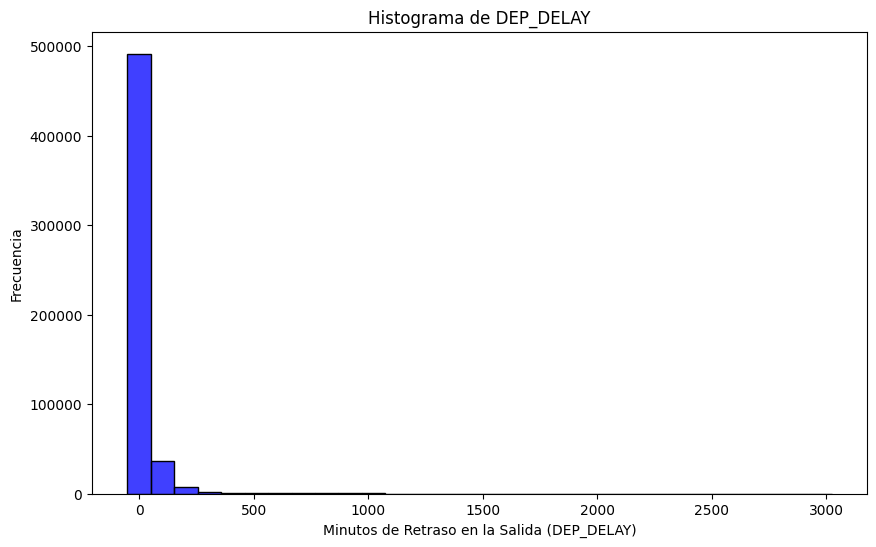

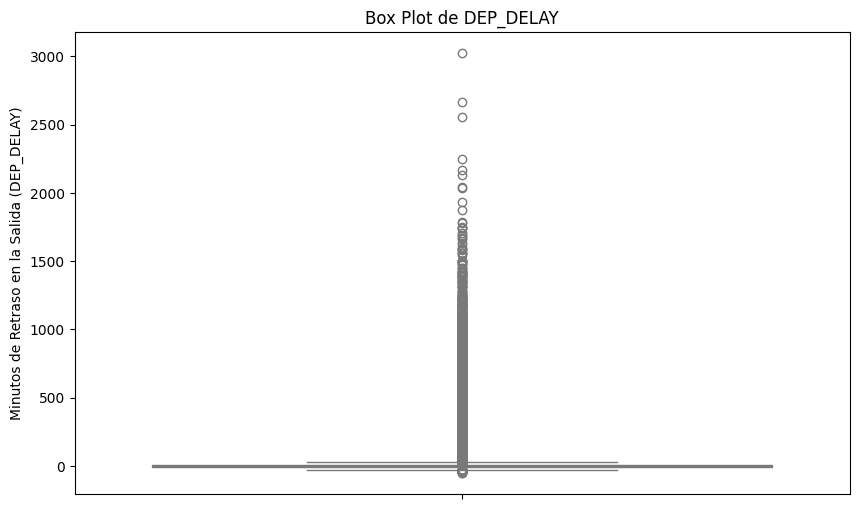

In [20]:
# Crear el histograma para la columna DEP_DELAY
plt.figure(figsize=(10, 6))
sns.histplot(df_consolidado['DEP_DELAY'], bins=30, kde=False, color='blue')
plt.title('Histograma de DEP_DELAY')
plt.xlabel('Minutos de Retraso en la Salida (DEP_DELAY)')
plt.ylabel('Frecuencia')
plt.show()
# Crear el box plot para la columna DEP_DELAY
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_consolidado['DEP_DELAY'], color='lightblue')
plt.title('Box Plot de DEP_DELAY')
plt.ylabel('Minutos de Retraso en la Salida (DEP_DELAY)')
plt.show()

In [21]:
# Filtrar valores de DEP_DELAY que están por encima de 0
df_dep_delay = df_consolidado[df_consolidado['DEP_DELAY'] > 0]

# Crear el histograma para la columna DEP_DELAY filtrada usando Plotly
fig_dep_h = px.histogram(df_dep_delay, x='DEP_DELAY', nbins=30,
                   title='Histograma de DEP_DELAY (Retrasos > 0 min)',
                   labels={'DEP_DELAY': 'Minutos de Retraso en la Salida (DEP_DELAY)'},
                   color_discrete_sequence=['blue'])

# Personalizar ejes
fig_dep_h.update_layout(xaxis_title='Minutos de Retraso en la Salida (DEP_DELAY)',
                  yaxis_title='Frecuencia')

# Mostrar el histograma
fig_dep_h.show()

In [22]:
# Filtrar los valores de DEP_DELAY mayores a 0
# Retrasos > 0 min - Retrasos anormales > 108
df_filtrado_dep = df_consolidado[df_consolidado['DEP_DELAY'] > 0]

# Crear el boxplot para la columna DEP_DELAY filtrada usando Plotly
fig_dep_b = px.box(df_filtrado_dep, y='DEP_DELAY', title='Box Plot de DEP_DELAY (Retrasos >0)',
             labels={'DEP_DELAY': 'Minutos de Retraso en la Salida (DEP_DELAY)'},
             color_discrete_sequence=['blue'])

# Mostrar el plot
fig_dep_b.show()


# ARR_DELAY

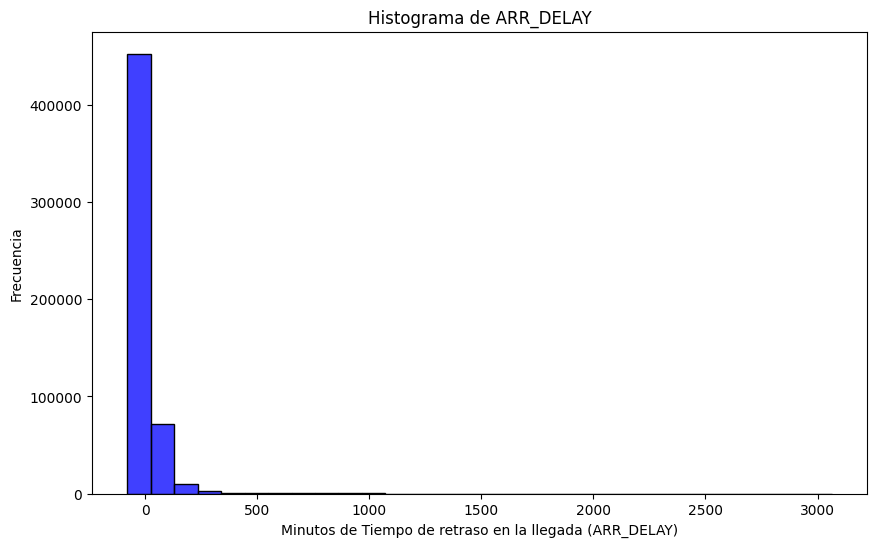

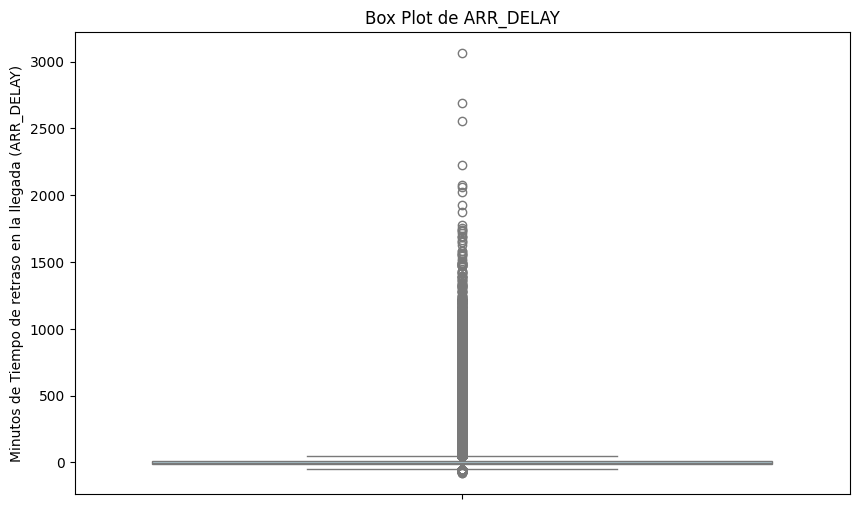

In [23]:
# Crear el histograma para la columna ARR_DELAY
plt.figure(figsize=(10, 6))
sns.histplot(df_consolidado['ARR_DELAY'], bins=30, kde=False, color='blue')
plt.title('Histograma de ARR_DELAY')
plt.xlabel('Minutos de Tiempo de retraso en la llegada (ARR_DELAY)')
plt.ylabel('Frecuencia')
plt.show()
# Crear el box plot para la columna ARR_DELAY
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_consolidado['ARR_DELAY'], color='lightblue')
plt.title('Box Plot de ARR_DELAY')
plt.ylabel('Minutos de Tiempo de retraso en la llegada (ARR_DELAY)')
plt.show()

In [24]:
# Filtrar valores de ARR_DELAY que están por encima de 0
df_arr_delay_h = df_consolidado[df_consolidado['ARR_DELAY'] > 0]

# Crear el histograma para la columna ARR_DELAY filtrada usando Plotly
fig_arr_h = px.histogram(df_arr_delay_h, x='ARR_DELAY', nbins=30,
                   title='Histograma de ARR_DELAY (Retrasos > 0 min)',
                   labels={'ARR_DELAY': 'Minutos de Retraso en la Llegada (ARR_DELAY)'},
                   color_discrete_sequence=['blue'])

# Personalizar ejes
fig_arr_h.update_layout(xaxis_title='Minutos de Retraso en la Llegada (ARR_DELAY)',
                  yaxis_title='Frecuencia')

# Mostrar el histograma
fig_arr_h.show()

In [25]:
# Filtrar los valores de ARR_DELAY mayores a 0
# Retrasos > 0 min - Retrasos anormales > 107
df_arr_delay_b = df_consolidado[df_consolidado['ARR_DELAY'] > 0]

# Crear el boxplot para la columna ARR_DELAY filtrada usando Plotly
fig_arr_b = px.box(df_arr_delay_b, y='ARR_DELAY', title='Box Plot de ARR_DELAY (Retrasos >0)',
             labels={'ARR_DELAY': 'Minutos de Retraso en la Llegada (ARR_DELAY)'},
             color_discrete_sequence=['blue'])

# Mostrar el plot
fig_arr_b.show()

# TOTAL_DELAY
## HISTOGRAMA Y BOXPLOT DE RETRASOS


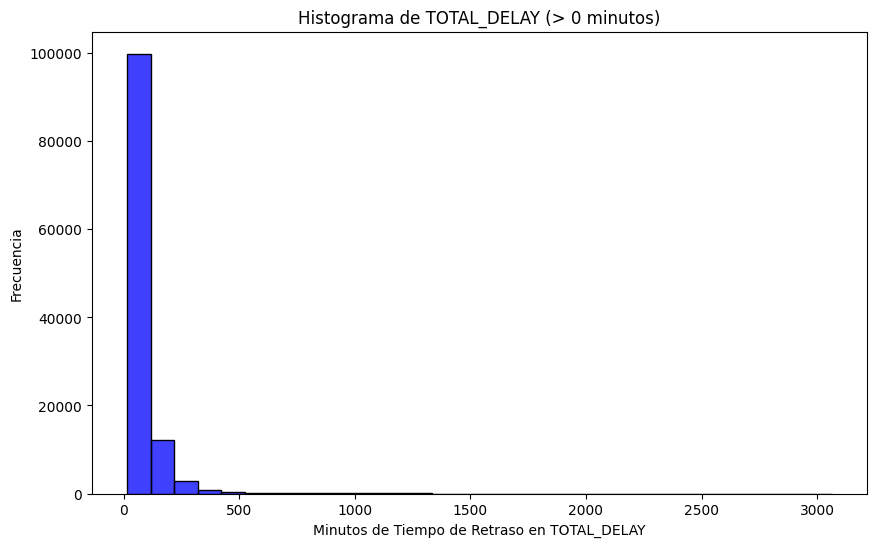

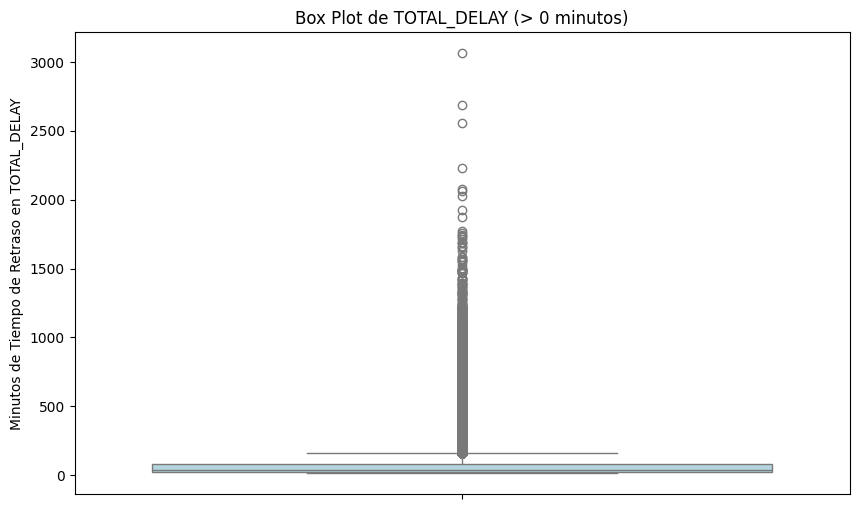

In [26]:
# Crear el histograma para la columna TOTAL_DELAY

# Filtrar valores de TOTAL_DELAY que están por encima de 0
df_total_delay = df_consolidado[df_consolidado['TOTAL_DELAY'] > 0]

# Crear el histograma para la columna TOTAL_DELAY filtrada
plt.figure(figsize=(10, 6))
sns.histplot(df_total_delay['TOTAL_DELAY'], bins=30, kde=False, color='blue')
plt.title('Histograma de TOTAL_DELAY (> 0 minutos)')
plt.xlabel('Minutos de Tiempo de Retraso en TOTAL_DELAY')
plt.ylabel('Frecuencia')
plt.show()

# Crear el box plot para la columna TOTAL_DELAY filtrada
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_total_delay['TOTAL_DELAY'], color='lightblue')
plt.title('Box Plot de TOTAL_DELAY (> 0 minutos)')
plt.ylabel('Minutos de Tiempo de Retraso en TOTAL_DELAY')
plt.show()

In [27]:
# Filtrar valores de TOTAL_DELAY que están por encima de 0 (162)
df_total_b = df_consolidado[df_consolidado['TOTAL_DELAY'] > 0]

# Crear el boxplot para la columna TOTAL_DELAY filtrada usando Plotly
fig_total_b = px.box(df_total_b, y='TOTAL_DELAY', title='Box Plot de TOTAL_DELAY (Retrasos >0)',
             labels={'TOTAL_DELAY': 'Minutos de Retraso en la Llegada (TOTAL_DELAY)'},
             color_discrete_sequence=['blue'])

# Mostrar el plot
fig_total_b.show()

In [28]:
# Filtrar valores de TOTAL_DELAY que están por encima de 0
df_total_h = df_consolidado[(df_consolidado['TOTAL_DELAY'] > 0) & (df_consolidado['TOTAL_DELAY'] < 300)]

# Crear el histograma para la columna TOTAL_DELAY filtrada usando Plotly
fig_total_h = px.histogram(df_total_h, x='TOTAL_DELAY', nbins=30,
                   title='Histograma de TOTAL_DELAY (Retrasos > 0 min a < 300 min )',
                   labels={'TOTAL_DELAY': 'Minutos de Retraso en la Llegada (TOTAL_DELAY)'},
                   color_discrete_sequence=['blue'])

# Personalizar ejes
fig_total_h.update_layout(xaxis_title='Minutos de Retraso en la Llegada (TOTAL_DELAY)',
                  yaxis_title='Frecuencia')

# Mostrar el histograma
fig_total_h.show()

In [29]:
# Filtrar valores de TOTAL_DELAY que están por encima de 0
df_total_delay_positive = df_consolidado[df_consolidado['TOTAL_DELAY'] > 0]

# Calcular Q1 (25%) y Q3 (75%)
Q1 = np.percentile(df_total_delay_positive['TOTAL_DELAY'], 25)
Q3 = np.percentile(df_total_delay_positive['TOTAL_DELAY'], 75)

# Calcular IQR
IQR = Q3 - Q1

# Definir límites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df_total_delay_positive[(df_total_delay_positive['TOTAL_DELAY'] < lower_bound) | (df_total_delay_positive['TOTAL_DELAY'] > upper_bound)]

# Identificar outliers por debajo del lower_bound y por encima del upper_bound
outliers_lower = df_total_delay_positive[df_total_delay_positive['TOTAL_DELAY'] < lower_bound]
outliers_upper = df_total_delay_positive[df_total_delay_positive['TOTAL_DELAY'] > upper_bound]

# Calcular el rango de los outliers
min_outlier_lower = outliers_lower['TOTAL_DELAY'].min()
max_outlier_lower = outliers_lower['TOTAL_DELAY'].max()

min_outlier_upper = outliers_upper['TOTAL_DELAY'].min()
max_outlier_upper = outliers_upper['TOTAL_DELAY'].max()

# Calcular la suma de los outliers
sum_outliers_lower = outliers_lower['TOTAL_DELAY'].sum()
sum_outliers_upper = outliers_upper['TOTAL_DELAY'].sum()

# Calcular el número de outliers
num_outliers_lower = outliers_lower.shape[0]
num_outliers_upper = outliers_upper.shape[0]

# Mostrar resultados
print(f"Rango de outliers por debajo del lower bound: {min_outlier_lower} a {max_outlier_lower}")
print(f"Número de outliers en el lower bound: {num_outliers_lower}")
print(f"Suma de outliers en el lower bound: {sum_outliers_lower}")

print(f"Rango de outliers por encima del upper bound: {min_outlier_upper} a {max_outlier_upper}")
print(f"Número de outliers en el upper bound: {num_outliers_upper}")
print(f"Suma de outliers en el upper bound: {sum_outliers_upper}")
print(f"Número total de outliers: {num_outliers_lower + num_outliers_upper}")
print(outliers)

Rango de outliers por debajo del lower bound: <NA> a <NA>
Número de outliers en el lower bound: 0
Suma de outliers en el lower bound: 0
Rango de outliers por encima del upper bound: 162 a 3063
Número de outliers en el upper bound: 9292
Suma de outliers en el upper bound: 2776343
Número total de outliers: 9292
           FL_DATE DAY_OF_WEEK AIRLINE_CODE  DOT_CODE  FL_NUMBER ORIGIN  \
71      2023-01-06      Friday           MQ     20398       3922    BHM   
299     2023-01-26    Thursday           MQ     20398       3344    DSM   
435     2023-01-31     Tuesday           MQ     20398       3516    DFW   
515     2023-01-31     Tuesday           MQ     20398       3369    JAN   
655     2023-01-23      Monday           MQ     20398       4094    CVG   
...            ...         ...          ...       ...        ...    ...   
538305  2023-01-03     Tuesday           WN     19393        222    MDW   
538331  2023-01-23      Monday           WN     19393       1525    SYR   
538598  2023-0

# DELAY_DUE_CARRIER
## HISTOGRAMA Y BOXPLOT DE RETRASOS

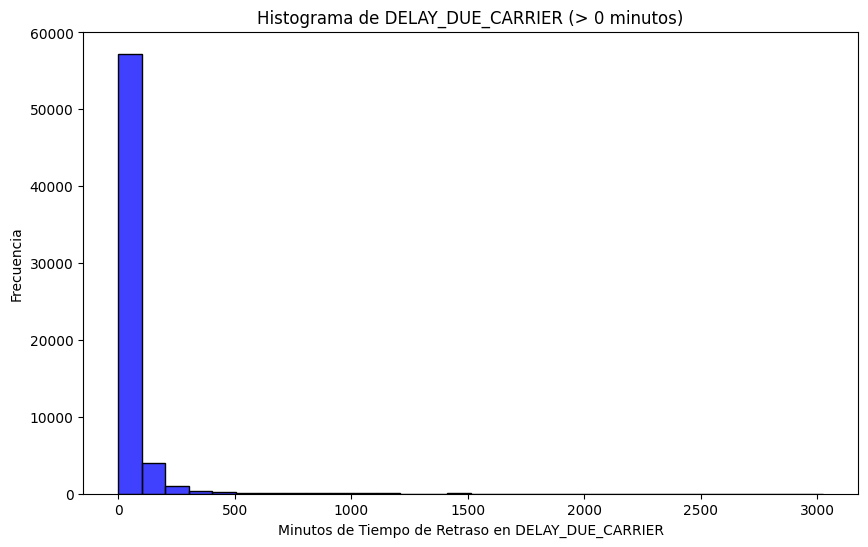

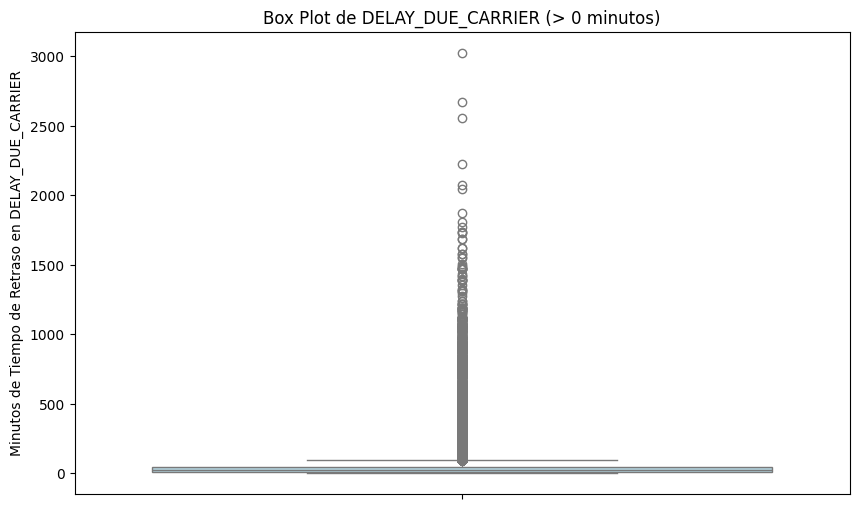

In [30]:
# Crear el histograma para la columna DELAY_DUE_CARRIER

# Filtrar valores de DELAY_DUE_CARRIER que están por encima de 0
df_delay_due_carrier = df_consolidado[df_consolidado['DELAY_DUE_CARRIER'] > 0]

# Crear el histograma para la columna DELAY_DUE_CARRIER filtrada
plt.figure(figsize=(10, 6))
sns.histplot(df_delay_due_carrier['DELAY_DUE_CARRIER'], bins=30, kde=False, color='blue')
plt.title('Histograma de DELAY_DUE_CARRIER (> 0 minutos)')
plt.xlabel('Minutos de Tiempo de Retraso en DELAY_DUE_CARRIER')
plt.ylabel('Frecuencia')
plt.show()

# Crear el box plot para la columna DELAY_DUE_CARRIER filtrada
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_delay_due_carrier['DELAY_DUE_CARRIER'], color='lightblue')
plt.title('Box Plot de DELAY_DUE_CARRIER (> 0 minutos)')
plt.ylabel('Minutos de Tiempo de Retraso en DELAY_DUE_CARRIER')
plt.show()


In [31]:
# Filtrar valores de DELAY_DUE_CARRIER que están por encima de 0 (95)
df_delay_due_carrier = df_consolidado[df_consolidado['DELAY_DUE_CARRIER'] > 0]

# Crear el boxplot para la columna DELAY_DUE_CARRIER filtrada usando Plotly
fig_delay_due_carrier = px.box(df_delay_due_carrier, y='DELAY_DUE_CARRIER',
title='Box Plot de DELAY_DUE_CARRIER (Retrasos >0)',
labels={'DELAY_DUE_CARRIER': 'Minutos de Retraso (DELAY_DUE_CARRIER)'},
color_discrete_sequence=['blue'])

# Mostrar el plot
fig_delay_due_carrier.show()


In [32]:
# Filtrar valores de DELAY_DUE_CARRIER que están por encima de 0 y por debajo de 300
df_delay_due_carrier = df_consolidado[(df_consolidado['DELAY_DUE_CARRIER'] > 0) & (df_consolidado['DELAY_DUE_CARRIER'] < 300)]

# Crear el histograma para la columna DELAY_DUE_CARRIER filtrada usando Plotly
fig_delay_due_carrier = px.histogram(df_delay_due_carrier, x='DELAY_DUE_CARRIER', nbins=30,
title='Histograma de DELAY_DUE_CARRIER (Retrasos > 0 min a < 300 min)',
labels={'DELAY_DUE_CARRIER': 'Minutos de Retraso (DELAY_DUE_CARRIER)'},
color_discrete_sequence=['blue'])

# Personalizar ejes
fig_delay_due_carrier.update_layout(xaxis_title='Minutos de Retraso (DELAY_DUE_CARRIER)',
                                    yaxis_title='Frecuencia')

# Mostrar el histograma
fig_delay_due_carrier.show()

# DELAY_DUE_WEATHER
## HISTOGRAMA Y BOXPLOTS DE RETRASOS

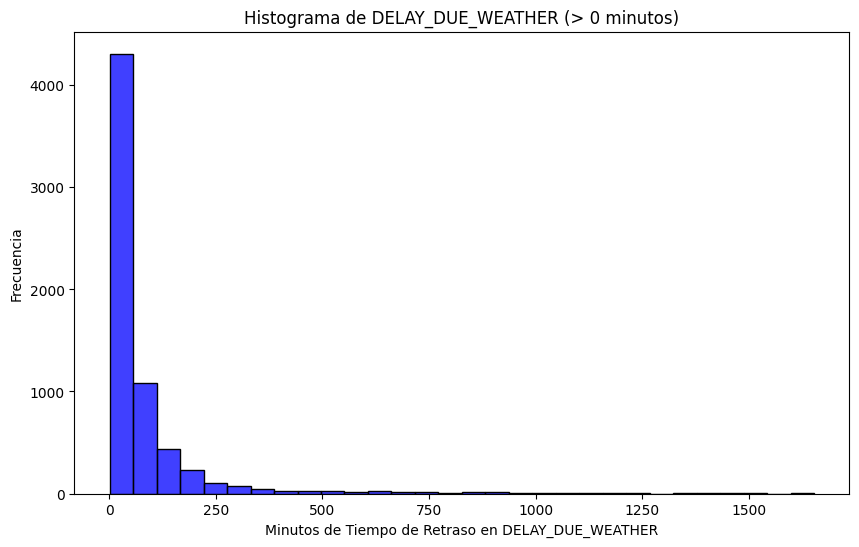

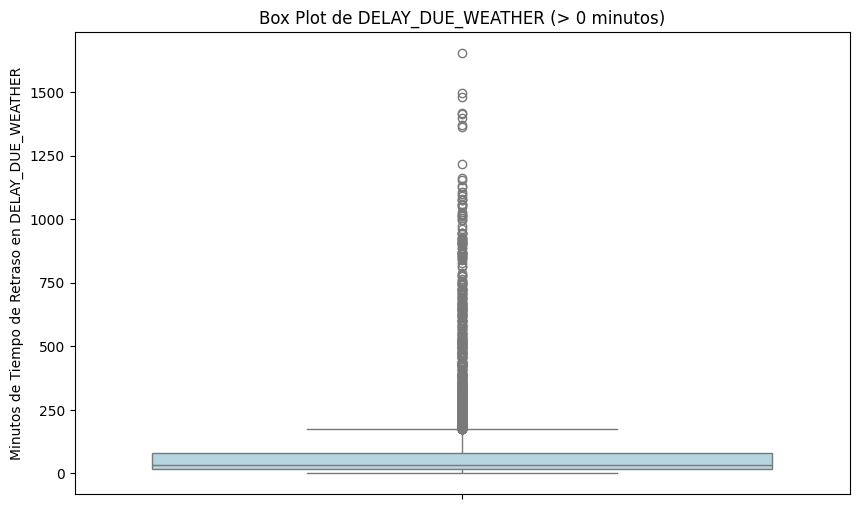

In [33]:
# Crear el histograma para la columna DELAY_DUE_WEATHER

# Filtrar valores de DELAY_DUE_WEATHER que están por encima de 0
df_delay_due_weather = df_consolidado[df_consolidado['DELAY_DUE_WEATHER'] > 0]

# Crear el histograma para la columna DELAY_DUE_WEATHER filtrada
plt.figure(figsize=(10, 6))
sns.histplot(df_delay_due_weather['DELAY_DUE_WEATHER'], bins=30, kde=False, color='blue')
plt.title('Histograma de DELAY_DUE_WEATHER (> 0 minutos)')
plt.xlabel('Minutos de Tiempo de Retraso en DELAY_DUE_WEATHER')
plt.ylabel('Frecuencia')
plt.show()

# Crear el box plot para la columna DELAY_DUE_WEATHER filtrada
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_delay_due_weather['DELAY_DUE_WEATHER'], color='lightblue')
plt.title('Box Plot de DELAY_DUE_WEATHER (> 0 minutos)')
plt.ylabel('Minutos de Tiempo de Retraso en DELAY_DUE_WEATHER')
plt.show()

In [34]:
# Filtrar valores de DELAY_DUE_WEATHER que están por encima de 0 (174)
df_delay_due_weather = df_consolidado[df_consolidado['DELAY_DUE_WEATHER'] > 0]

# Crear el boxplot para la columna DELAY_DUE_WEATHER filtrada usando Plotly
fig_delay_due_weather = px.box(df_delay_due_weather, y='DELAY_DUE_WEATHER',
title='Box Plot de DELAY_DUE_WEATHER (Retrasos >0)',
labels={'DELAY_DUE_WEATHER': 'Minutos de Retraso (DELAY_DUE_WEATHER)'},
color_discrete_sequence=['blue'])

# Mostrar el plot
fig_delay_due_weather.show()


In [35]:
# Filtrar valores de DELAY_DUE_WEATHER que están por encima de 0 y por debajo de 300
df_delay_due_weather = df_consolidado[(df_consolidado['DELAY_DUE_WEATHER'] > 0) & (df_consolidado['DELAY_DUE_WEATHER'] < 300)]

# Crear el histograma para la columna DELAY_DUE_WEATHER filtrada usando Plotly
fig_delay_due_weather = px.histogram(df_delay_due_weather, x='DELAY_DUE_WEATHER', nbins=30,
title='Histograma de DELAY_DUE_WEATHER (Retrasos > 0 min a < 300 min)',
labels={'DELAY_DUE_WEATHER': 'Minutos de Retraso (DELAY_DUE_WEATHER)'},
color_discrete_sequence=['blue'])

# Personalizar ejes
fig_delay_due_weather.update_layout(xaxis_title='Minutos de Retraso (DELAY_DUE_WEATHER)',
                                    yaxis_title='Frecuencia')

# Mostrar el histograma
fig_delay_due_weather.show()


# DELAY_DUE_NAS
## HISTOGRAMA Y BOXPLOTS DE RETRASOS

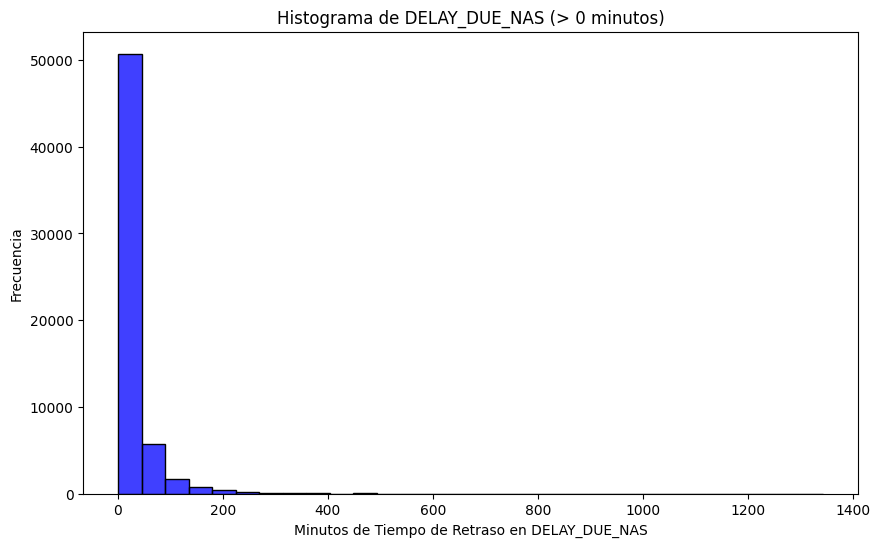

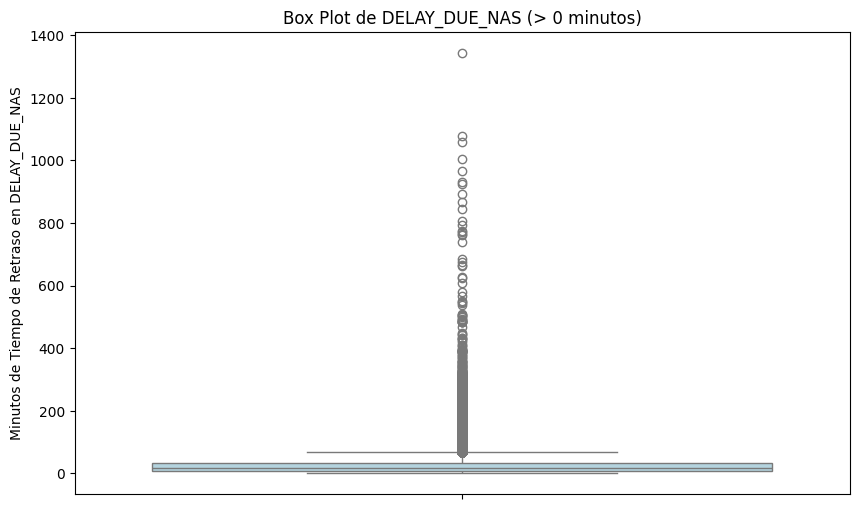

In [36]:
# Crear el histograma para la columna DELAY_DUE_NAS

# Filtrar valores de DELAY_DUE_NAS que están por encima de 0
df_delay_due_nas = df_consolidado[df_consolidado['DELAY_DUE_NAS'] > 0]

# Crear el histograma para la columna DELAY_DUE_NAS filtrada
plt.figure(figsize=(10, 6))
sns.histplot(df_delay_due_nas['DELAY_DUE_NAS'], bins=30, kde=False, color='blue')
plt.title('Histograma de DELAY_DUE_NAS (> 0 minutos)')
plt.xlabel('Minutos de Tiempo de Retraso en DELAY_DUE_NAS')
plt.ylabel('Frecuencia')
plt.show()

# Crear el box plot para la columna DELAY_DUE_NAS filtrada
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_delay_due_nas['DELAY_DUE_NAS'], color='lightblue')
plt.title('Box Plot de DELAY_DUE_NAS (> 0 minutos)')
plt.ylabel('Minutos de Tiempo de Retraso en DELAY_DUE_NAS')
plt.show()

In [37]:
# Filtrar valores de DELAY_DUE_NAS que están por encima de 0 (68)
df_delay_due_nas = df_consolidado[df_consolidado['DELAY_DUE_NAS'] > 0]

# Crear el boxplot para la columna DELAY_DUE_NAS filtrada usando Plotly
fig_delay_due_nas = px.box(df_delay_due_nas, y='DELAY_DUE_NAS',
title='Box Plot de DELAY_DUE_NAS (Retrasos >0)',
labels={'DELAY_DUE_NAS': 'Minutos de Retraso (DELAY_DUE_NAS)'},
color_discrete_sequence=['blue'])

# Mostrar el plot
fig_delay_due_nas.show()

In [38]:
# Filtrar valores de DELAY_DUE_NAS que están por encima de 0 y por debajo de 300
df_delay_due_nas = df_consolidado[(df_consolidado['DELAY_DUE_NAS'] > 0) & (df_consolidado['DELAY_DUE_NAS'] < 300)]

# Crear el histograma para la columna DELAY_DUE_NAS filtrada usando Plotly
fig_delay_due_nas = px.histogram(df_delay_due_nas, x='DELAY_DUE_NAS', nbins=30,
title='Histograma de DELAY_DUE_NAS (Retrasos > 0 min a < 300 min)',
labels={'DELAY_DUE_NAS': 'Minutos de Retraso (DELAY_DUE_NAS)'},
color_discrete_sequence=['blue'])

# Personalizar ejes
fig_delay_due_nas.update_layout(xaxis_title='Minutos de Retraso (DELAY_DUE_NAS)',
                                yaxis_title='Frecuencia')

# Mostrar el histograma
fig_delay_due_nas.show()


# DELAY_DUE_SECURITY
## HISTOGRAMA Y BOXPLOTS DE RETRASOS

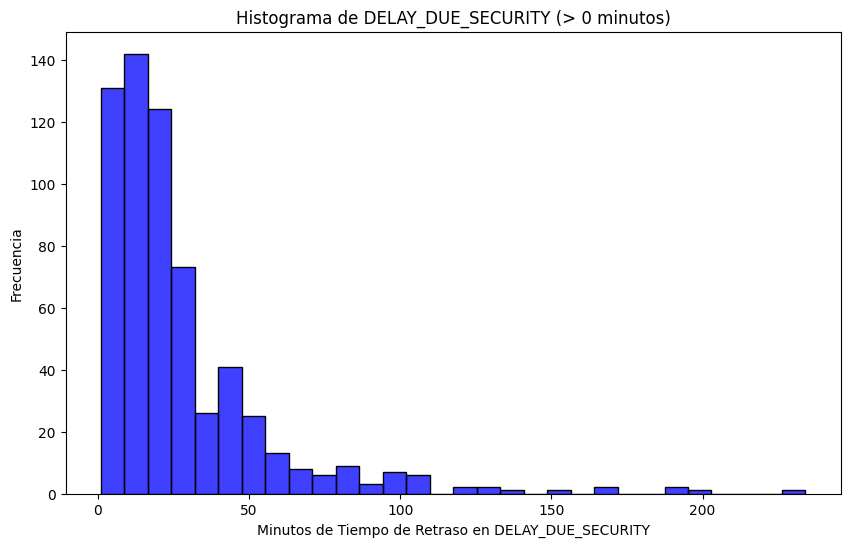

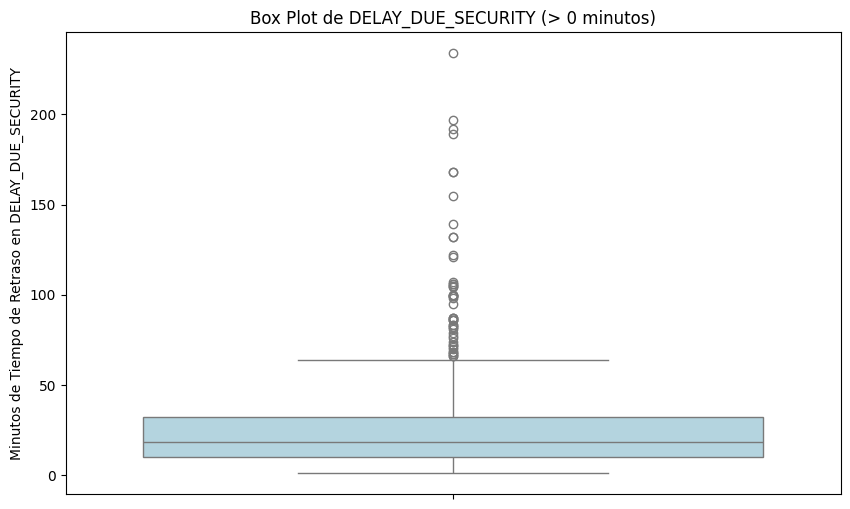

In [39]:
# Crear el histograma para la columna DELAY_DUE_SECURITY

# Filtrar valores de DELAY_DUE_SECURITY que están por encima de 0
df_delay_due_security = df_consolidado[df_consolidado['DELAY_DUE_SECURITY'] > 0]

# Crear el histograma para la columna DELAY_DUE_SECURITY filtrada
plt.figure(figsize=(10, 6))
sns.histplot(df_delay_due_security['DELAY_DUE_SECURITY'], bins=30, kde=False, color='blue')
plt.title('Histograma de DELAY_DUE_SECURITY (> 0 minutos)')
plt.xlabel('Minutos de Tiempo de Retraso en DELAY_DUE_SECURITY')
plt.ylabel('Frecuencia')
plt.show()

# Crear el box plot para la columna DELAY_DUE_SECURITY filtrada
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_delay_due_security['DELAY_DUE_SECURITY'], color='lightblue')
plt.title('Box Plot de DELAY_DUE_SECURITY (> 0 minutos)')
plt.ylabel('Minutos de Tiempo de Retraso en DELAY_DUE_SECURITY')
plt.show()

In [40]:
# Filtrar valores de DELAY_DUE_SECURITY que están por encima de 0 (64)
df_delay_due_security = df_consolidado[df_consolidado['DELAY_DUE_SECURITY'] > 0]

# Crear el boxplot para la columna DELAY_DUE_SECURITY filtrada usando Plotly
fig_delay_due_security = px.box(df_delay_due_security, y='DELAY_DUE_SECURITY',
title='Box Plot de DELAY_DUE_SECURITY (Retrasos >0)',
labels={'DELAY_DUE_SECURITY': 'Minutos de Retraso (DELAY_DUE_SECURITY)'},
color_discrete_sequence=['blue'])

# Mostrar el plot
fig_delay_due_security.show()

In [41]:
# Filtrar valores de DELAY_DUE_SECURITY que están por encima de 0 y por debajo de 300
df_delay_due_security = df_consolidado[(df_consolidado['DELAY_DUE_SECURITY'] > 0) & (df_consolidado['DELAY_DUE_SECURITY'] < 300)]

# Crear el histograma para la columna DELAY_DUE_SECURITY filtrada usando Plotly
fig_delay_due_security = px.histogram(df_delay_due_security, x='DELAY_DUE_SECURITY', nbins=30,
title='Histograma de DELAY_DUE_SECURITY (Retrasos > 0 min a < 300 min)',
labels={'DELAY_DUE_SECURITY': 'Minutos de Retraso (DELAY_DUE_SECURITY)'},
color_discrete_sequence=['blue'])

# Personalizar ejes
fig_delay_due_security.update_layout(xaxis_title='Minutos de Retraso (DELAY_DUE_SECURITY)',
                                     yaxis_title='Frecuencia')

# Mostrar el histograma
fig_delay_due_security.show()

# DELAY_DUE_LATE_AIRCRAFT
## HISTOGRAMA Y BOXPLOTS DE RETRASOS

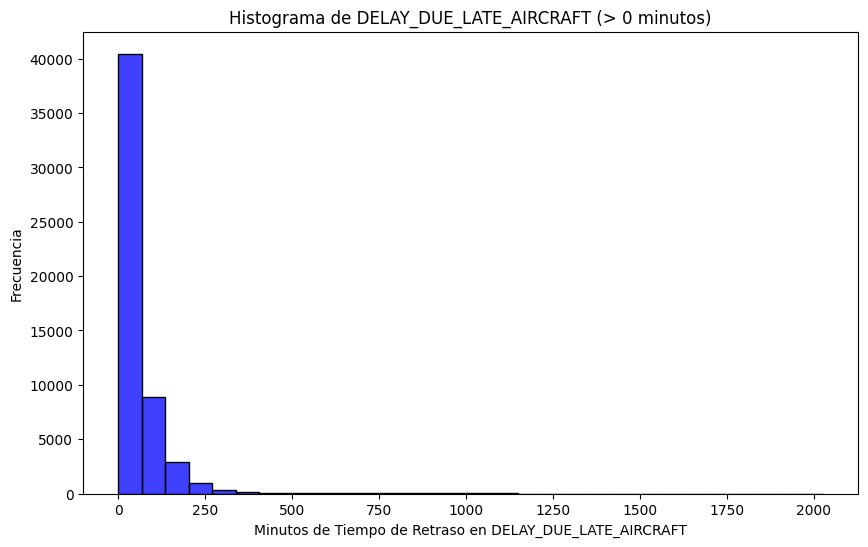

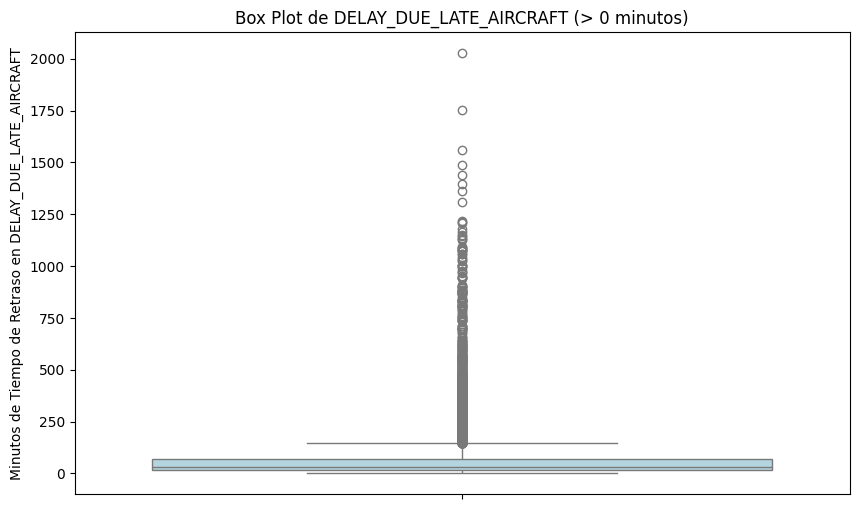

In [42]:
# Crear el histograma para la columna DELAY_DUE_LATE_AIRCRAFT

# Filtrar valores de DELAY_DUE_LATE_AIRCRAFT que están por encima de 0
df_delay_due_late_aircraft = df_consolidado[df_consolidado['DELAY_DUE_LATE_AIRCRAFT'] > 0]

# Crear el histograma para la columna DELAY_DUE_LATE_AIRCRAFT filtrada
plt.figure(figsize=(10, 6))
sns.histplot(df_delay_due_late_aircraft['DELAY_DUE_LATE_AIRCRAFT'], bins=30, kde=False, color='blue')
plt.title('Histograma de DELAY_DUE_LATE_AIRCRAFT (> 0 minutos)')
plt.xlabel('Minutos de Tiempo de Retraso en DELAY_DUE_LATE_AIRCRAFT')
plt.ylabel('Frecuencia')
plt.show()

# Crear el box plot para la columna DELAY_DUE_LATE_AIRCRAFT filtrada
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_delay_due_late_aircraft['DELAY_DUE_LATE_AIRCRAFT'], color='lightblue')
plt.title('Box Plot de DELAY_DUE_LATE_AIRCRAFT (> 0 minutos)')
plt.ylabel('Minutos de Tiempo de Retraso en DELAY_DUE_LATE_AIRCRAFT')
plt.show()


In [43]:
# Filtrar valores de DELAY_DUE_LATE_AIRCRAFT que están por encima de 0 (148)
df_delay_due_late_aircraft = df_consolidado[df_consolidado['DELAY_DUE_LATE_AIRCRAFT'] > 0]

# Crear el boxplot para la columna DELAY_DUE_LATE_AIRCRAFT filtrada usando Plotly
fig_delay_due_late_aircraft = px.box(df_delay_due_late_aircraft, y='DELAY_DUE_LATE_AIRCRAFT',
title='Box Plot de DELAY_DUE_LATE_AIRCRAFT (Retrasos >0)',
labels={'DELAY_DUE_LATE_AIRCRAFT': 'Minutos de Retraso (DELAY_DUE_LATE_AIRCRAFT)'},
color_discrete_sequence=['blue'])

# Mostrar el plot
fig_delay_due_late_aircraft.show()

In [44]:
# Filtrar valores de DELAY_DUE_LATE_AIRCRAFT que están por encima de 0 y por debajo de 300
df_delay_due_late_aircraft = df_consolidado[(df_consolidado['DELAY_DUE_LATE_AIRCRAFT'] > 0) & (df_consolidado['DELAY_DUE_LATE_AIRCRAFT'] < 300)]

# Crear el histograma para la columna DELAY_DUE_LATE_AIRCRAFT filtrada usando Plotly
fig_delay_due_late_aircraft = px.histogram(df_delay_due_late_aircraft, x='DELAY_DUE_LATE_AIRCRAFT', nbins=30,
title='Histograma de DELAY_DUE_LATE_AIRCRAFT (Retrasos > 0 min a < 300 min)',
labels={'DELAY_DUE_LATE_AIRCRAFT': 'Minutos de Retraso (DELAY_DUE_LATE_AIRCRAFT)'},
color_discrete_sequence=['blue'])

# Personalizar ejes
fig_delay_due_late_aircraft.update_layout(xaxis_title='Minutos de Retraso (DELAY_DUE_LATE_AIRCRAFT)',
                                          yaxis_title='Frecuencia')

# Mostrar el histograma
fig_delay_due_late_aircraft.show()


In [45]:
# Seleccionar solo las columnas numéricas que quieres incluir en la matriz de correlación
df_numeric = df_consolidado.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Crear el mapa de calor de la matriz de correlación
fig_matriz = ff.create_annotated_heatmap(
    z=correlation_matrix.values,
    x=list(correlation_matrix.columns),
    y=list(correlation_matrix.index),
    annotation_text=correlation_matrix.round(2).values,
    colorscale='Viridis'
)

# Ajustar el layout del gráfico
fig_matriz.update_layout(
    title='Matriz de Correlación',
    xaxis_nticks=36,
    xaxis={'side': 'bottom'},  # Mover los nombres de las columnas a la parte inferior
    yaxis={'autorange': 'reversed'},  # Asegurar que los nombres de las filas se ordenen correctamente
    width=800,  # Ajustar el ancho del gráfico
    height=800  # Ajustar la altura del gráfico
)

# Mostrar el mapa de calor
fig_matriz.show()